### Data Analysis and Visualization
CA1 Index Generation and Visualization
Matthew Riddell - D00245674

### 1. Theoretical Framework

I wish to create a Country Healthy Index (CDI) to show which countries are the healthiest based on the following dimensions:


### Dimensions

<ul>
<li>Longevity</li>	
<li>Access to Care</li>	
<li>Health Outcomes</li>	
<li>Financial Risk</li>	
<li>Environmental Factors</li>		   
</ul>







### References:

World Data 2023, Kaggle Dataset
https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023





### 2. Data Selection

For the development of the Country Healthy Index, the following variables from the dataset will be used:

<ul>
<li><b>Life Expectancy:</b> Average number of years a newborn is expected to live.</li>
<li><b>Physicians per Thousand:</b> Number of physicians per thousand people.</li>
<li><b>Infant Mortality:</b> Number of deaths per 1,000 live births before reaching one year of age.</li>	
<li><b>Maternal Mortality Ratio:</b> Number of maternal deaths per 100,000 live births.</li>	
<li><b>Out of Pocket Health Expenditure (%):</b> Percentage of total health expenditure paid out-of-pocket by individuals</li>	
<li><b>CO2 Emissions:</b> Carbon dioxide emissions in tons.</li>
</ul>

### Importing Dataset:

In [4]:
import pandas as pd

# loading dataset
file_path = "world-data-2023.csv"
df = pd.read_csv(file_path)

# printing the columns from the dataset
print("Available Columns:\n", df.columns.tolist())

# selection of relevant indicators for the Country Healthy Index (CHI)
selected_columns = [
    'Country',
    'Life expectancy',
    'Physicians per thousand',
    'Infant mortality',
    'Maternal mortality ratio',
    'Out of pocket health expenditure',
    'Co2-Emissions'
]

df_selected = df[selected_columns].copy()

# Rename variables for convenience 
df_selected = df_selected.rename(columns={
    'Life expectancy': 'life_expectancy',
    'Physicians per thousand': 'physicians_per_thousand',
    'Infant mortality': 'infant_mortality',
    'Maternal mortality ratio': 'maternal_mortality_ratio',
    'Out of pocket health expenditure': 'out_of_pocket_expenditure',
    'Co2-Emissions': 'co2_emissions'
})

# View the first few rows of the selected data
df_selected.head()


Available Columns:
 ['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Largest city', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Official language', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


,Country,life_expectancy,physicians_per_thousand,infant_mortality,maternal_mortality_ratio,out_of_pocket_expenditure,co2_emissions
0,Afghanistan,64.5,0.28,47.9,638.0,78.40%,"8,672"
1,Albania,78.5,1.20,7.8,15.0,56.90%,"4,536"
2,Algeria,76.7,1.72,20.1,112.0,28.10%,"150,006"
3,Andorra,NaN,3.33,2.7,NaN,36.40%,469
4,Angola,60.8,0.21,51.6,241.0,33.40%,"34,693"


### 3. Imputation of Missing Data

Checking selected variables for missing data

In [7]:
missing_values = df_selected.isnull().sum()
print(missing_values)

# handle numerical strings and convert to floats
df_selected['out_of_pocket_expenditure'] = (
    df_selected['out_of_pocket_expenditure']
    .str.rstrip('%')     
    .astype(float)        
)

df_selected['co2_emissions'] = (
    df_selected['co2_emissions']
    .astype(str)             
    .str.replace(',', '')     
    .astype(float)           
)

# fill missing values with mean avg values
df_selected.fillna(df_selected.mean(numeric_only=True), inplace=True)

# view cleaned data
print("\nCleaned Data (with filled values):")
print(df_selected.head())

print(missing_values)

Country                       0
life_expectancy               8
physicians_per_thousand       7
infant_mortality              6
maternal_mortality_ratio     14
out_of_pocket_expenditure     7
co2_emissions                 7
dtype: int64

Cleaned Data (with filled values):
       Country  life_expectancy  physicians_per_thousand  infant_mortality  \
0  Afghanistan        64.500000                     0.28              47.9   
1      Albania        78.500000                     1.20               7.8   
2      Algeria        76.700000                     1.72              20.1   
3      Andorra        72.279679                     3.33               2.7   
4       Angola        60.800000                     0.21              51.6   

   maternal_mortality_ratio  out_of_pocket_expenditure  co2_emissions  
0                638.000000                       78.4         8672.0  
1                 15.000000                       56.9         4536.0  
2                112.000000               

### 4. Multivariate Analysis

In [9]:
# imports 

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [10]:
# declare variables
country = df_selected['Country']
life_expectancy = df_selected['life_expectancy']
physicians_per_thousand = df_selected['physicians_per_thousand']
infant_mortality = df_selected['infant_mortality']
maternal_mortality_ratio = df_selected['maternal_mortality_ratio']
out_of_pocket_expenditure = df_selected['out_of_pocket_expenditure']
co2_emissions = df_selected['co2_emissions']

### Life Expectancy vs Physicians per Thousand

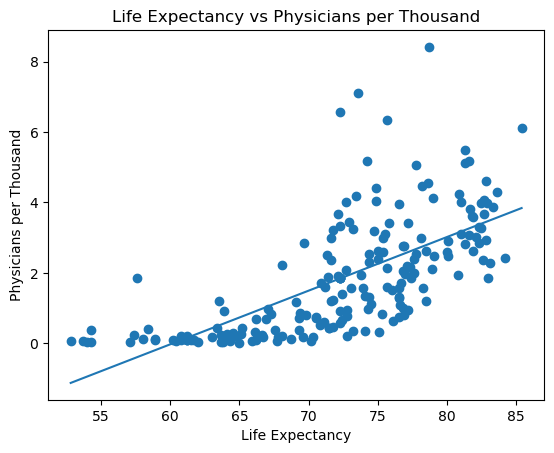

In [12]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Physicians per Thousand")
plt.xlabel("Life Expectancy")
plt.ylabel("Physicians per Thousand")
plt.scatter(life_expectancy, physicians_per_thousand)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, physicians_per_thousand, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Infant Mortality

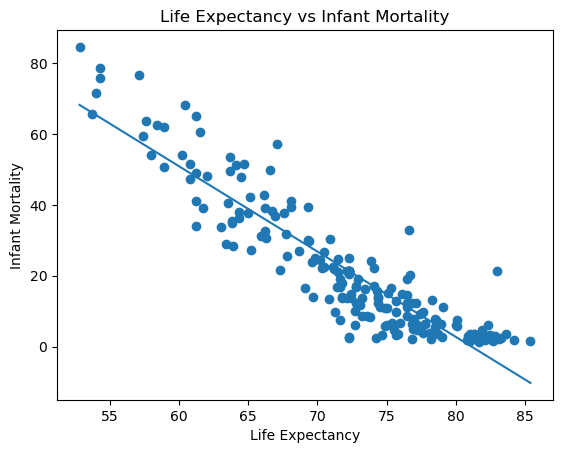

In [14]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Infant Mortality")
plt.xlabel("Life Expectancy")
plt.ylabel("Infant Mortality")
plt.scatter(life_expectancy, infant_mortality)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, infant_mortality, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Maternal Mortality Ratio

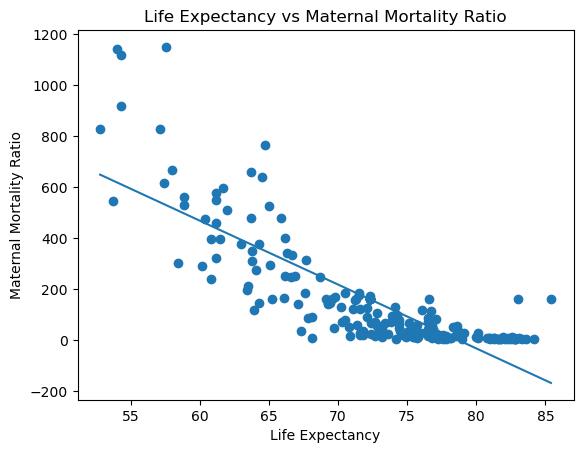

In [16]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Maternal Mortality Ratio")
plt.xlabel("Life Expectancy")
plt.ylabel("Maternal Mortality Ratio")
plt.scatter(life_expectancy, maternal_mortality_ratio)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, maternal_mortality_ratio, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Out of Pocket Expenditure

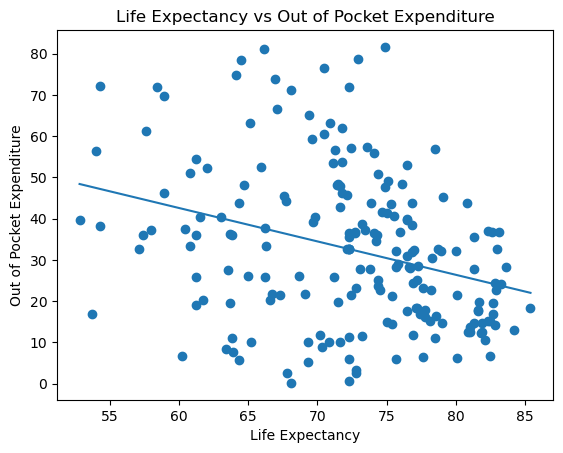

In [18]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Out of Pocket Expenditure")
plt.xlabel("Life Expectancy")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(life_expectancy, out_of_pocket_expenditure)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, out_of_pocket_expenditure, 1))(np.unique(life_expectancy)))

### Life Expectancy vs CO2 Emissions

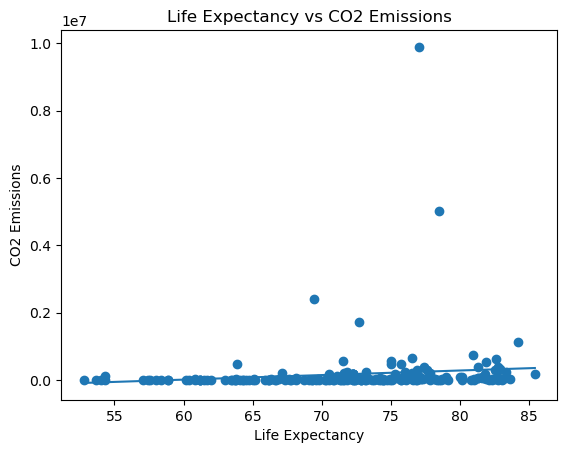

In [20]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs CO2 Emissions")
plt.xlabel("Life Expectancy")
plt.ylabel("CO2 Emissions")
plt.scatter(life_expectancy, co2_emissions)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, co2_emissions, 1))(np.unique(life_expectancy)))

### Physicians Per Thousand vs Infant Mortality

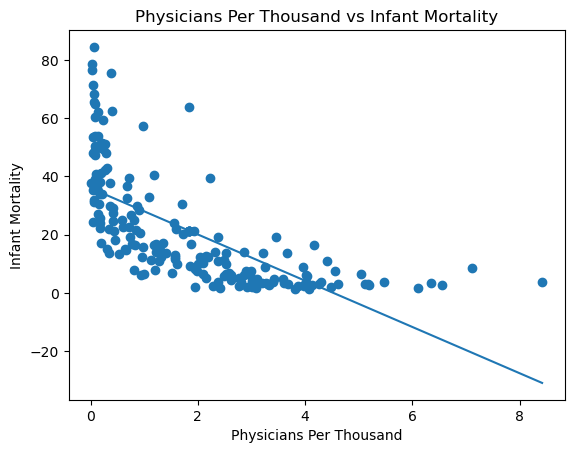

In [22]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs Infant Mortality")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("Infant Mortality")
plt.scatter(physicians_per_thousand, infant_mortality)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, infant_mortality, 1))(np.unique(physicians_per_thousand)))

### Physicians Per Thousand vs Maternal Mortality Ratio

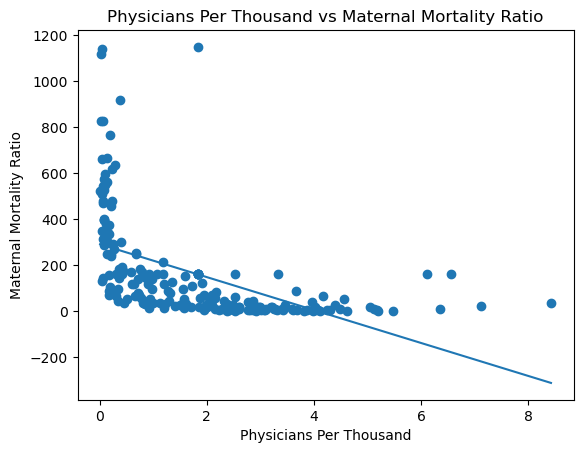

In [24]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs Maternal Mortality Ratio")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("Maternal Mortality Ratio")
plt.scatter(physicians_per_thousand, maternal_mortality_ratio)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, maternal_mortality_ratio, 1))(np.unique(physicians_per_thousand)))

### Physicians Per Thousand vs Out of Pocket Expenditure

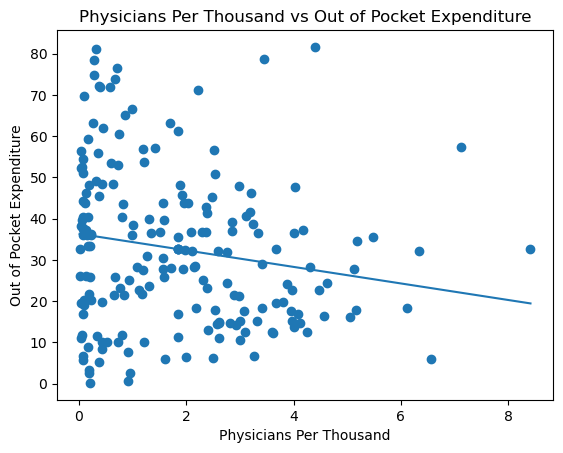

In [26]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs Out of Pocket Expenditure")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(physicians_per_thousand, out_of_pocket_expenditure)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, out_of_pocket_expenditure, 1))(np.unique(physicians_per_thousand)))

### Physicians Per Thousand vs CO2 Emissions

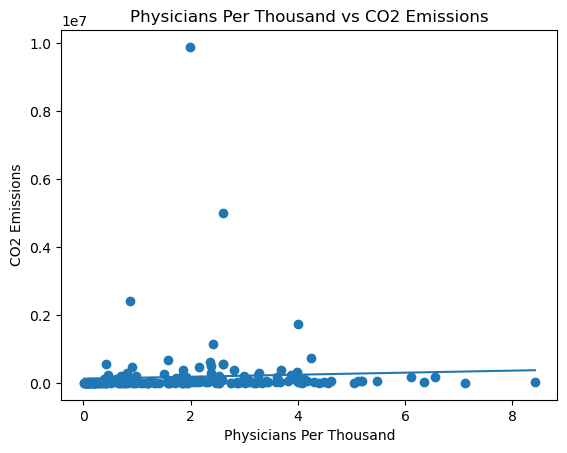

In [28]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs CO2 Emissions")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("CO2 Emissions")
plt.scatter(physicians_per_thousand, co2_emissions)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, co2_emissions, 1))(np.unique(physicians_per_thousand)))

### Infant Mortality vs Maternal Mortality Ratio

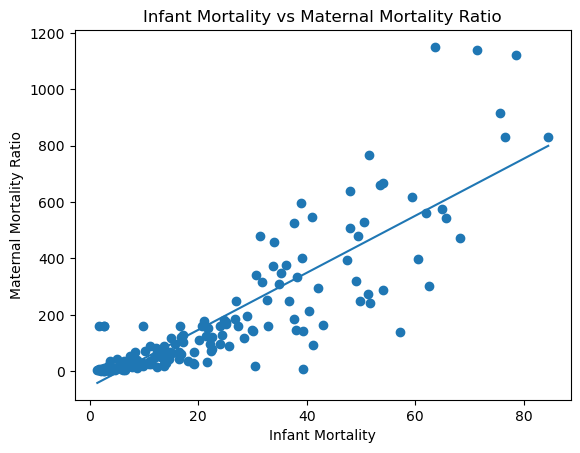

In [30]:
from matplotlib import pyplot as plt
plt.title("Infant Mortality vs Maternal Mortality Ratio")
plt.xlabel("Infant Mortality")
plt.ylabel("Maternal Mortality Ratio")
plt.scatter(infant_mortality, maternal_mortality_ratio)
plt.plot(np.unique(infant_mortality), np.poly1d(np.polyfit(infant_mortality, maternal_mortality_ratio, 1))(np.unique(infant_mortality)))

### Infant Mortality vs Out of Pocket Expenditure

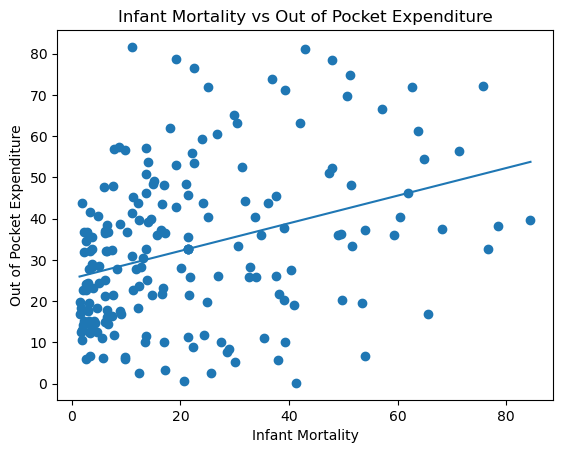

In [32]:
from matplotlib import pyplot as plt
plt.title("Infant Mortality vs Out of Pocket Expenditure")
plt.xlabel("Infant Mortality")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(infant_mortality, out_of_pocket_expenditure)
plt.plot(np.unique(infant_mortality), np.poly1d(np.polyfit(infant_mortality, out_of_pocket_expenditure, 1))(np.unique(infant_mortality)))

### Infant Mortality vs CO2 Emissions

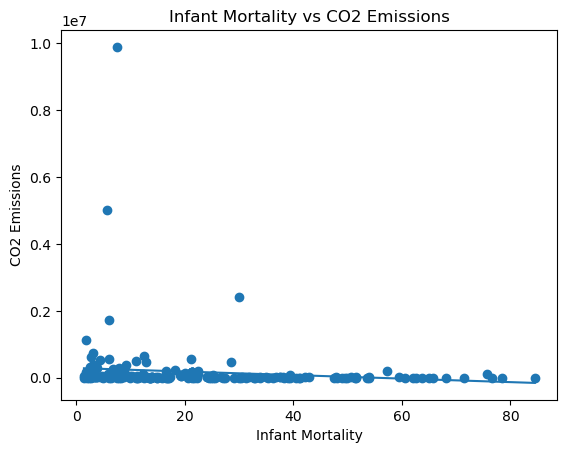

In [34]:
from matplotlib import pyplot as plt
plt.title("Infant Mortality vs CO2 Emissions")
plt.xlabel("Infant Mortality")
plt.ylabel("CO2 Emissions")
plt.scatter(infant_mortality, co2_emissions)
plt.plot(np.unique(infant_mortality), np.poly1d(np.polyfit(infant_mortality, co2_emissions, 1))(np.unique(infant_mortality)))

### Maternal Mortality Ratio vs Out of Pocket Expenditure

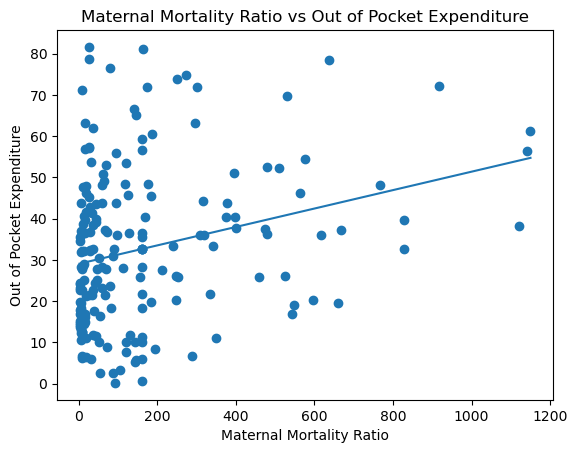

In [36]:
from matplotlib import pyplot as plt
plt.title("Maternal Mortality Ratio vs Out of Pocket Expenditure")
plt.xlabel("Maternal Mortality Ratio")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(maternal_mortality_ratio, out_of_pocket_expenditure)
plt.plot(np.unique(maternal_mortality_ratio), np.poly1d(np.polyfit(maternal_mortality_ratio, out_of_pocket_expenditure, 1))(np.unique(maternal_mortality_ratio)))

### Maternal Mortality Ratio vs CO2 Emissions

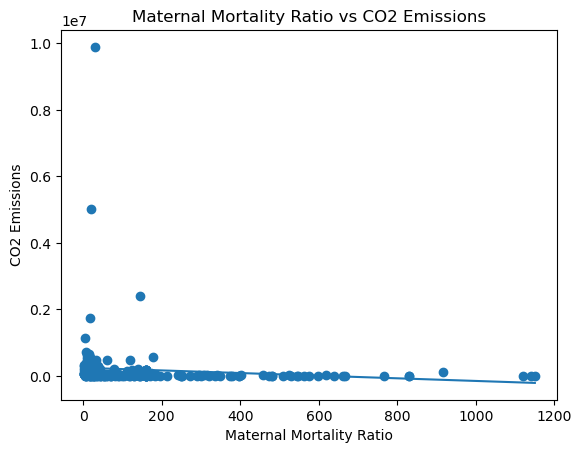

In [38]:
from matplotlib import pyplot as plt
plt.title("Maternal Mortality Ratio vs CO2 Emissions")
plt.xlabel("Maternal Mortality Ratio")
plt.ylabel("CO2 Emissions")
plt.scatter(maternal_mortality_ratio, co2_emissions)
plt.plot(np.unique(maternal_mortality_ratio), np.poly1d(np.polyfit(maternal_mortality_ratio, co2_emissions, 1))(np.unique(maternal_mortality_ratio)))

### Out of Pocket Expenditure vs CO2 Emissions

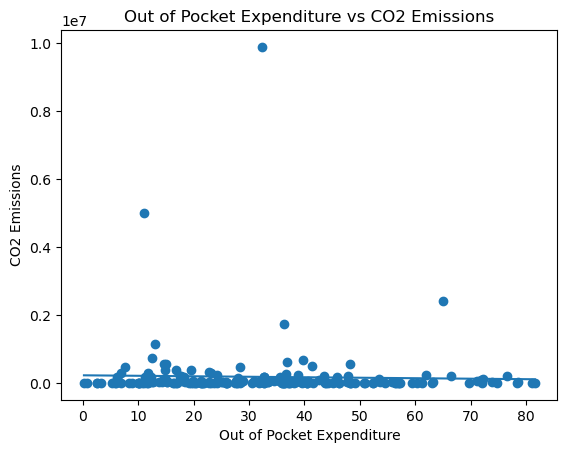

In [40]:
from matplotlib import pyplot as plt
plt.title("Out of Pocket Expenditure vs CO2 Emissions")
plt.xlabel("Out of Pocket Expenditure")
plt.ylabel("CO2 Emissions")
plt.scatter(out_of_pocket_expenditure, co2_emissions)
plt.plot(np.unique(out_of_pocket_expenditure), np.poly1d(np.polyfit(out_of_pocket_expenditure, co2_emissions, 1))(np.unique(out_of_pocket_expenditure)))

### Heatmap of correlations

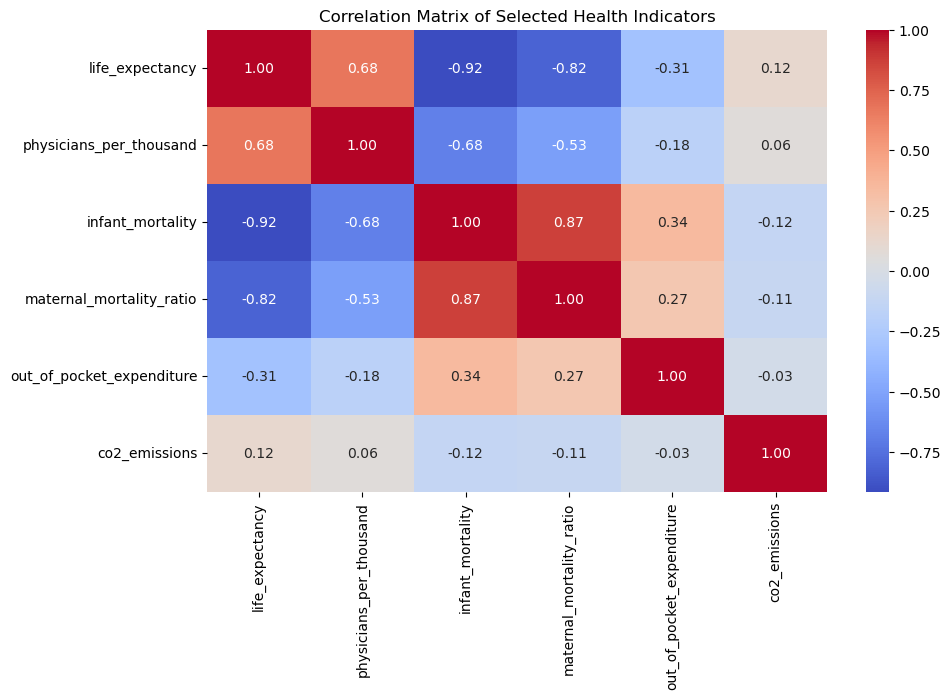

In [42]:
numeric_cols = df_selected.drop(columns=['Country'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Health Indicators")
plt.show()

Infant Mortality and Maternal Mortality Rate are almost the same 
Highly redundant

Dropping Maternal Mortality Rate from the selected variables

In [44]:
# Dropping redundant 'maternal_mortality_ratio'
df_selected.drop(columns=['maternal_mortality_ratio'], inplace=True)

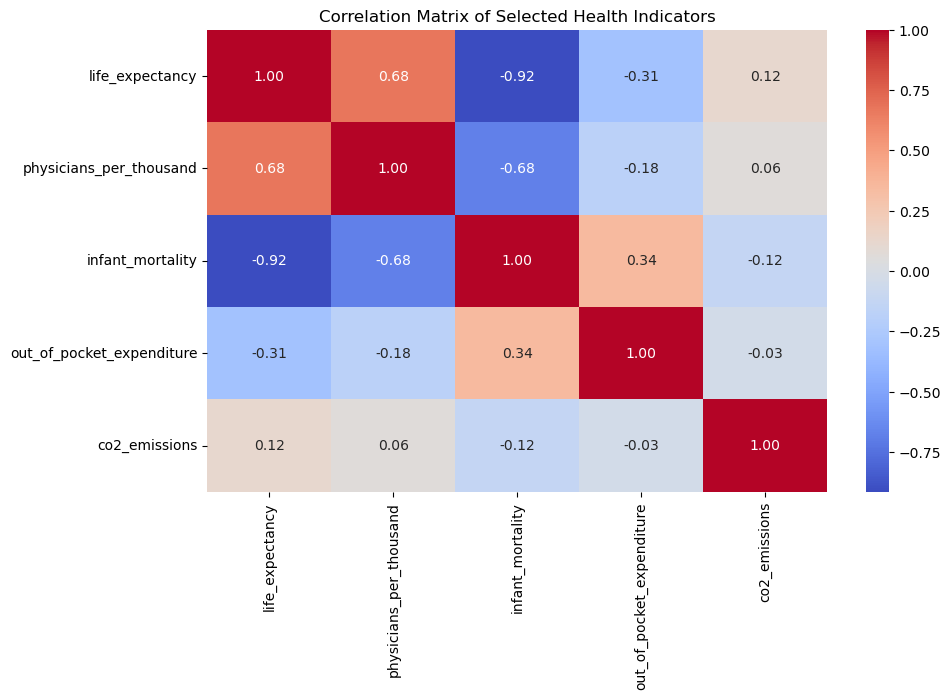

In [45]:
numeric_cols = df_selected.drop(columns=['Country'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Health Indicators")
plt.show()

### Boxplots for Outlier Detection

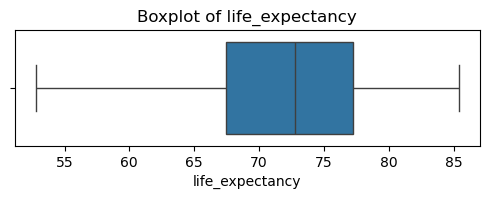

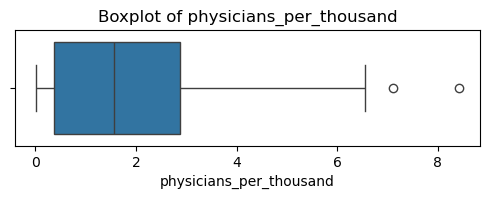

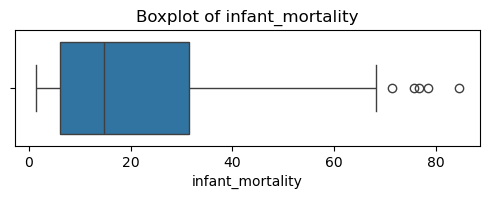

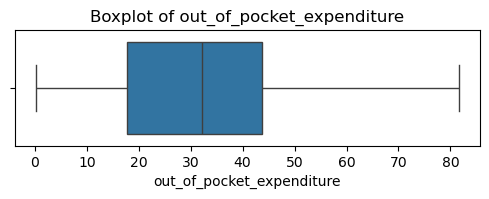

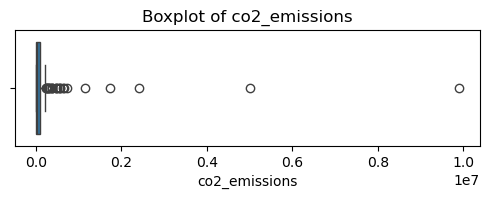

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in df_selected.drop(columns=['Country']).columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_selected[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


CO2 Emissions show extreme outliers, Particularly for large industrialised countries like the United States and China

### 5. Normalisation

here we normalise the variables so that they are scaled properly, we use min max scaling here

In [104]:
from sklearn.preprocessing import MinMaxScaler

# Country Names separated from numeric variables
countries = df_selected['Country']

# Selecting numeric values
features = df_selected.drop(columns=['Country'])

# Using Min-Max scaling to normalise variables
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convert back to DataFrame
df_normalized = pd.DataFrame(normalized_features, columns=features.columns)
df_normalized['Country'] = countries.values

# Reverse negatively associated indicators
df_normalized['infant_mortality'] = -df_normalized['infant_mortality']
df_normalized['out_of_pocket_expenditure'] = -df_normalized['out_of_pocket_expenditure']


# Preview noramised variables
df_normalized.head()


,life_expectancy,physicians_per_thousand,infant_mortality,out_of_pocket_expenditure,co2_emissions,country_healthy_index,country_healthy_index_scaled,Country
0,0.358896,0.032105,-0.559567,-0.960688,0.000875,0.223983,0.223983,Afghanistan
1,0.788344,0.141498,-0.077016,-0.696560,0.000457,0.646229,0.646229,Albania
2,0.733129,0.203329,-0.225030,-0.342752,0.015162,0.655574,0.655574,Algeria
3,0.597536,0.394768,-0.015644,-0.444717,0.000046,0.716268,0.716268,Andorra
4,0.245399,0.023781,-0.604091,-0.407862,0.003506,0.271629,0.271629,Angola


### 6. Weighting and Aggregation

### PCA - Princicpal Component Analysis

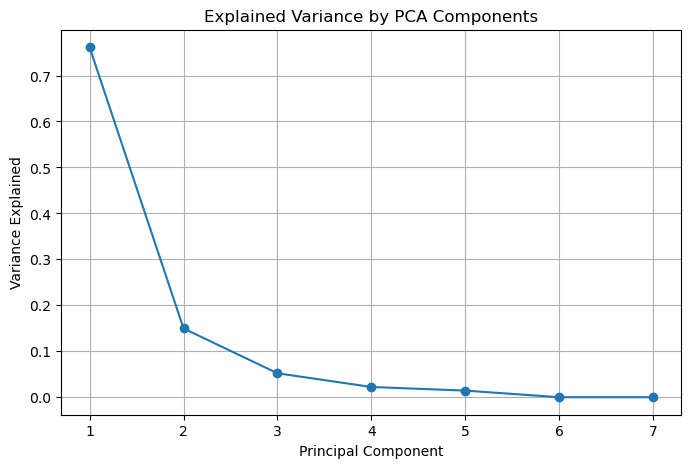

In [106]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Run PCA on normalized features
pca = PCA()
pca_data = pca.fit_transform(df_normalized.drop(columns=['Country']))

# Explained variance
explained_var = pca.explained_variance_ratio_

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.xticks(range(1, len(explained_var)+1))
plt.grid(True)
plt.show()

In [55]:
# PCA Loadings (weights of each feature on components)
loadings = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i+1}' for i in range(len(features.columns))])
print("PCA Loadings:\n", loadings)

PCA Loadings:
      life_expectancy  physicians_per_thousand  infant_mortality  \
PC1         0.587761                 0.425475          0.611484   
PC2        -0.165839                -0.262353         -0.140935   
PC3        -0.350187                 0.864637         -0.328404   
PC4        -0.054979                 0.047610         -0.029922   
PC5         0.708083                 0.016688         -0.705323   

     out_of_pocket_expenditure  co2_emissions  
PC1                   0.314391       0.027468  
PC2                   0.940059      -0.009764  
PC3                   0.129546      -0.071695  
PC4                   0.009456       0.996858  
PC5                   0.024005       0.016857  


In [108]:
# Using first principal component (PC1) as the Country Healthy Index
df_selected['country_healthy_index'] = pca_data[:, 0]

# Normalise scaling of Country Healthy Index between 0 - 100
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_selected['country_healthy_index_scaled'] = scaler.fit_transform(df_selected[['country_healthy_index']]) * 100




In [110]:
# Top 10 healthiest countries
print(df_selected[['Country', 'country_healthy_index_scaled']].sort_values(by='country_healthy_index_scaled', ascending=False).head(10))

# Bottom 10
print(df_selected[['Country', 'country_healthy_index_scaled']].sort_values(by='country_healthy_index_scaled', ascending=True).head(10))


        Country  country_healthy_index_scaled
149  San Marino                    100.000000
42         Cuba                     95.357705
9       Austria                     92.286942
76      Iceland                     90.933661
168      Sweden                     90.512733
82       Israel                     90.289990
64      Germany                     89.921472
60       France                     89.790246
140    Portugal                     89.337337
113      Monaco                     89.192862
                      Country  country_healthy_index_scaled
126                   Nigeria                      0.000000
33   Central African Republic                      1.096999
34                       Chad                      4.348339
155              Sierra Leone                      5.779753
53          Equatorial Guinea                     10.713157
160                   Somalia                     11.108298
69                     Guinea                     16.011162
95            

### 7. Visualisation of the Results

### List of the Top 100 Healthiest Countries

In [112]:
# Sort countries in descending order
df_ranked = df_selected.sort_values('country_healthy_index_scaled', ascending=False).reset_index(drop=True)

# Ranking
df_ranked['Rank'] = df_ranked.index + 1

# Top 100 countries
top_100 = df_ranked[['Rank', 'Country', 'country_healthy_index_scaled']].head(100)

# Column names
top_100.columns = ['Rank', 'Country', 'Health Index (0–100)']

print(top_100.to_string(index=False))


 Rank                Country  Health Index (0–100)
    1             San Marino            100.000000
    2                   Cuba             95.357705
    3                Austria             92.286942
    4                Iceland             90.933661
    5                 Sweden             90.512733
    6                 Israel             90.289990
    7                Germany             89.921472
    8                 France             89.790246
    9               Portugal             89.337337
   10                 Monaco             89.192862
   11                  Italy             88.996298
   12            Switzerland             88.913922
   13                  Spain             88.794435
   14            Netherlands             88.774061
   15                Denmark             88.637630
   16              Australia             88.375822
   17                 Greece             88.367304
   18                  Japan             88.349249
   19                Finland   

### Barchart showing the top 25 healthiest countries

C:\Users\Matty\AppData\Local\Temp\ipykernel_11236\4030870956.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




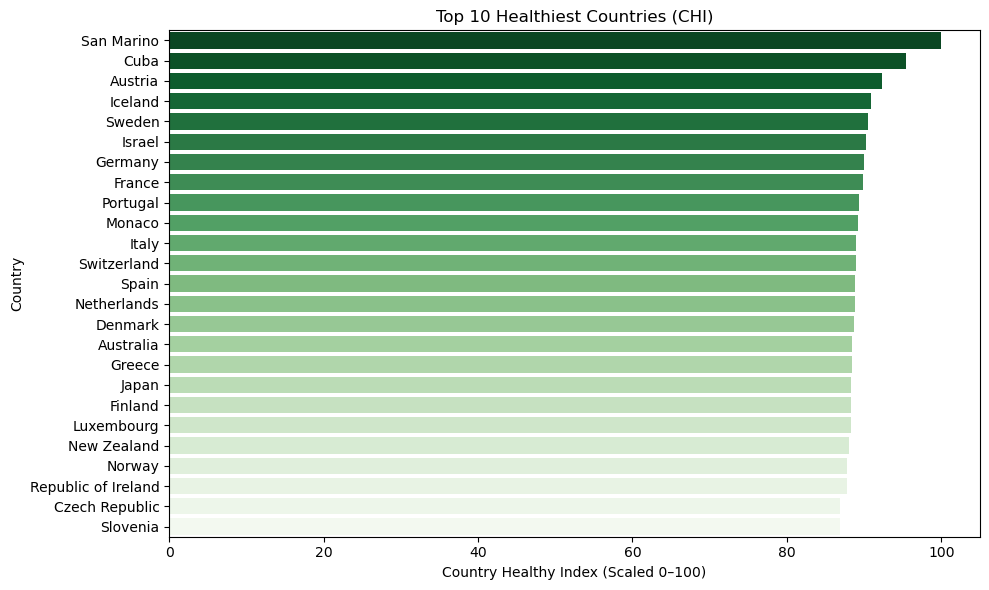

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10 = df_selected.sort_values('country_healthy_index_scaled', ascending=False).head(25)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='country_healthy_index_scaled', y='Country', palette='Greens_r')
plt.title('Top 10 Healthiest Countries (CHI)')
plt.xlabel('Country Healthy Index (Scaled 0–100)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Histogram showing distribution of countries based of CHI ranking

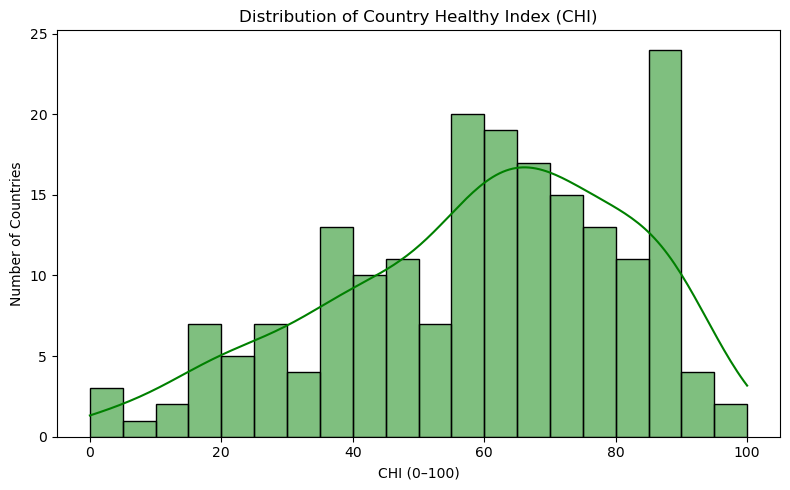

In [116]:
plt.figure(figsize=(8, 5))
sns.histplot(df_selected['country_healthy_index_scaled'], bins=20, kde=True, color='green')
plt.title('Distribution of Country Healthy Index (CHI)')
plt.xlabel('CHI (0–100)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

### CHI represented on World Map

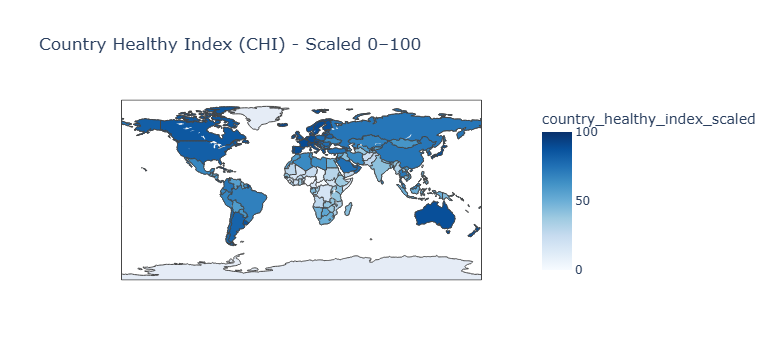

In [118]:
import plotly.express as px

fig = px.choropleth(df_selected,
                    locations='Country',
                    locationmode='country names',
                    color='country_healthy_index_scaled',
                    color_continuous_scale='Blues',
                    title='Country Healthy Index (CHI) - Scaled 0–100')
fig.show()

### 8. Links to other Indicators

### Human Development Index vs Country Health Index

source: https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset/data

Correlation (HDI vs. CHI): 0.90


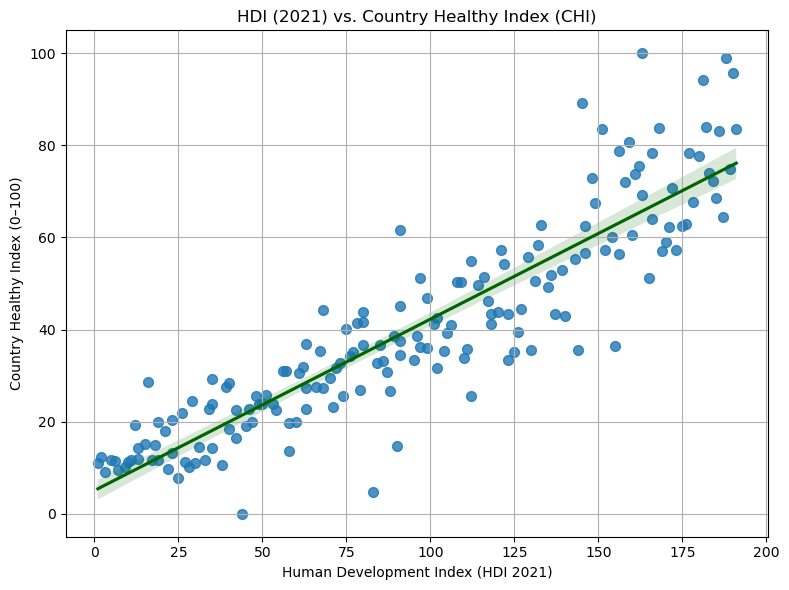

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Loading HDI dataset
hdi_df = pd.read_csv("hdi.csv")
hdi_df.columns = hdi_df.columns.str.strip()

# Search for '2021' column
year_col = [col for col in hdi_df.columns if '2021' in col][0]
hdi_2021 = hdi_df[['Country', year_col]].dropna()
hdi_2021 = hdi_2021.rename(columns={year_col: 'HDI_2021'})
hdi_2021['HDI_2021'] = pd.to_numeric(hdi_2021['HDI_2021'], errors='coerce')

# Merge with Country Health Index
comparison_df = df_selected.merge(hdi_2021, on='Country', how='inner')

# Normalise and rescale
scaler = MinMaxScaler()
comparison_df['CHI'] = scaler.fit_transform(
    -comparison_df[['country_healthy_index_scaled']]
) * 100

# Correlation
corr = comparison_df['CHI'].corr(comparison_df['HDI_2021'])
print(f"Correlation (HDI vs. CHI): {corr:.2f}")

# Plot
plt.figure(figsize=(8, 6))
sns.regplot(data=comparison_df,
            x='HDI_2021',
            y='CHI',
            scatter_kws={'s': 50},
            line_kws={'color': 'darkgreen'})
plt.title('HDI (2021) vs. Country Healthy Index (CHI)')
plt.xlabel('Human Development Index (HDI 2021)')
plt.ylabel('Country Healthy Index (0–100)')
plt.grid(True)
plt.tight_layout()
plt.show()
